SQ 5)
## II. Perform the following on the CardioGoodFitness.csv dataset.

**i) Import libraries and read data from the file.**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Datasets/CardioGoodFitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


**ii) Display box plot of gender and age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


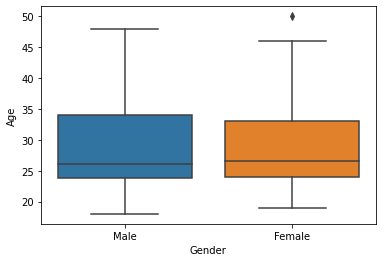

In [ ]:
sns.boxplot(df.Gender, df.Age)

**iii) Print product wise gender wise count of sales**

In [108]:
df.groupby(['Product','Gender']).Product.count()

Product  Gender
TM195    Female    40
         Male      40
TM498    Female    29
         Male      31
TM798    Female     7
         Male      33
Name: Product, dtype: int64

**iv) Display crosstab of product and gender data**

In [111]:
pd.crosstab(df.Product, df.Gender)

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


**v). Display count plot of product**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


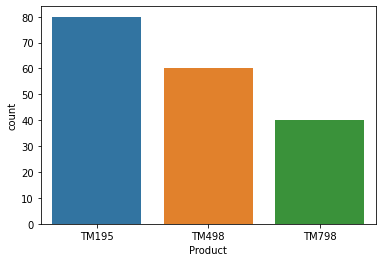

In [112]:
sns.countplot(df.Product)

##II. Perform the following on the CardioGoodFitness.csv dataset.

**i). Store in X , Usage and fitness column data and in y miles data.**

In [113]:
X = df.iloc[: , 5:7]
y = df['Miles']

In [115]:
X

,Usage,Fitness
0,3,4
1,2,3
2,4,3
3,3,3
4,4,2
...,...,...
175,6,5
176,5,4
177,5,5
178,4,5


In [116]:
y

0      112
1       75
2       66
3       85
4       47
      ... 
175    200
176    200
177    160
178    120
179    180
Name: Miles, Length: 180, dtype: int64

**ii). Apply splitting on the dataset as 75% for training and 25% for testing.**

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 1)

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**iii). Apply logistic regression algorithm.**

In [119]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)

**iv). Fit the data and predict outcome**

In [120]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [123]:
y_pred=logreg.predict(X_test)
y_pred

array([ 85,  85,  85, 200,  85,  85,  85,  85,  85,  85,  85,  85,  85,
        85,  94,  85,  53, 200,  85,  94, 180,  85,  85, 200, 200,  85,
        85,  85, 200,  85,  85,  85,  85,  85,  85, 180,  85,  85, 180,
        47, 200,  85,  85,  85, 200])

**v) Display confusion matrix and accuracy**

In [124]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0

In [125]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.17777777777777778
